In [ ]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install keras
%pip install numpy
%pip install textblob
%pip install nltk

#Sentiment of Original Texts

In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.display import Markdown
from bs4 import BeautifulSoup
from IPython.display import display, Markdown


# Data Preparation
response = requests.get("https://www.rocketlawyer.com/business-and-contracts/service-contracts/care-provider-contracts/document/day-care-contract")
response.encoding = "ISO-8859-1"
text_data = response.text

# Extract the text from the HTML content
soup = BeautifulSoup(text_data, "html.parser")
text = soup.get_text()


# Split the text data into individual documents
documents = text_data.split('\n')
documents = text.split('. ')

# Split the documents into training and testing sets
train_data, test_data = train_test_split(documents, test_size=0.2)

# Split the text into individual sentences
sentences = text.split('. ')

# Text Vectorization with Stop Words
vectorizer = CountVectorizer(stop_words='english')
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

# Define Training Labels
train_labels = [0] * len(train_data)

# Building the RNNs Model
model = Sequential()
model.add(Embedding(input_dim=train_vectors.shape[1], output_dim=100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Training the RNNs Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_labels = np.array(train_labels)
model.fit(train_vectors.toarray(), train_labels, epochs=10, batch_size=32)

# Predicting the Polarity
predictions = model.predict(test_vectors.toarray())

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = analyzer.polarity_scores(sentences)
print("Overall Sentiment Score is Positive:",sentiment_scores)

Epoch 1/10
3/3 [==============================] - 10s 2s/step - loss: 0.6405 - accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 5s 1s/step - loss: 0.4853 - accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 0.1944 - accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 5s 1s/step - loss: 0.0085 - accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 3s 872ms/step - loss: 9.2842e-04 - accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 2s 670ms/step - loss: 3.5983e-04 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 3s 898ms/step - loss: 1.9994e-04 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 3s 690ms/step - loss: 1.2987e-04 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 2s 686ms/step - loss: 9.3221e-05 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 975ms/step
Overall Sentiment Score is Positive: {'neg':

#Inject Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "Our day care contract ensures the safety and well-being of your child throughout their time with us",
    "We provide a nurturing and stimulating environment for your child, as outlined in our day care contract",
    "Our day care contract guarantees open and transparent communication between parents and caregivers",
    "We have a comprehensive day care contract that outlines our policies and procedures, ensuring a smooth and organized experience for both parents and children",

]

# highlighted_text = ""
# for i, sentence in enumerate(sentences):
#     if i < len(positive_sentences):
#         # Inject positive sentence
#         highlighted_sentence = f"**{positive_sentences[i]}**"
#         highlighted_text += highlighted_sentence + ". "
#     highlighted_text += sentence + ". "

# # Display the modified text with highlighted positive sentences
# display(Markdown(highlighted_text))

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)

































. 






Free Day Care Contract Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Care provider contracts













MAKE YOUR FREE Day Care Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Day Care Contract
            


Make document                    



 







What is a Day Care Contract?
Day care owners and parents often use Day Care Contracts as a means of documenting the details of child care. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Day Care Contract also made:





Nanny Agreement
Hire a nanny or a babysitter







Pet Sitting Contract
Hire a pet sitter for when you are away







Dog Walking Contract
Put together a contract for dog walking services







Home Health Care Contract
Establish terms for home health care services






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Day Care Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. 



Am I required to do anything else after I have drafted my Day Care Contract?





Upon completing a contract, you will be able to get to it on any device. 



Can I have my Day Care Contracts looked at by a lawyer?





If you attempt it on your own, hiring a lawyer to give feedback on documents may be costly. 



How do I fill out a Day Care Contract for free?





If you need to prepare this document with Rocket Lawyer you can follow the directions provided. 



How should I organize my contract for day care?





While you may have different policies related to the care of infants and preschoolers, here a few high-level details that your Child Care Contract should include:Each parent or legal guardian's full name and addressWhat kind of childcare services will be delivered by the nanny or day care providerInformation about drop-off and pick-up timesMedical treatment and sick child policyWhat fees will be charged and whenAs expected, this contract from Rocket Lawyer also contains the standard legalese about the non-employer relationship between the parties, confidentiality, and dispute resolution.            .           .          The Parent(s) shall provide  with  advance written notice of expected family vacations.                   .                   .                   .                   .                   .                 The Parent(s) shall be responsible to arrange for alternate care if the child(ren) is unable to attend as provided in this Contract.       If a check is returned unpaid, all future payments by the Parent(s) shall be made in cash.       will be reduced proportionately for the days during which the Provider is closed for vacation.                  .                  .                  .                  .                  .                  .                  .                  .                The Parent(s) agrees to provide a medical report describing the child(ren)'s personal medical history to  prior to the child(ren)'s first day of care.        Name:  Name:            .       This contract shall be signed by and by , the Parent(s).              The Parent(s) shall pay child care fees based on the above schedule at the rates specified below.  The child care fees be adjusted for these federal holidays during which 's facility is closed.  shall provide  as well as         The Provider will provide the Parent(s) with a list of substitute child care providers upon request. 's facility                    . **Our day care contract ensures the safety and well-being of your child throughout their time with us**. **Our day care contract guarantees open and transparent communication between parents and caregivers**. **We have a comprehensive day care contract that outlines our policies and procedures, ensuring a smooth and organized experience for both parents and children**. **We provide a nurturing and stimulating environment for your child, as outlined in our day care contract**. AMENDMENT, MODIFICATION, AND WAIVER. ASSIGNMENT. AUTHORITY TO PICK UP CHILD. An easier way to double-check your contract is through the Rocket Lawyer On CallÃÂ® attorney network. As with any legal document that you sign, it is encouraged that you send your document for legal review by a lawyer in our nationwide attorney network. Attached to your Day Care Contract, there's a set of instructions for what comes next after your document is completed. BINDING EFFECT. Breach of this Contract in any way by the Parent(s) may result in immediate termination of child care services. By signing this Contract, the undersigned represents that the undersigned has understood and agreed to the terms and conditions of this Contract. CONSTRUCTION. CONTRACTED HOURS. Child care fees be adjusted for the days a sick child does not attend the child care facility. Child care fees for "Full-Time" prescheduled child care are  per . Child care fees for any unscheduled hours are  per week, or if less than 1 week,  per day, or if less than 1 day,  per hour. Children are expected to treat all property located at the facility with respect, including but not limited to toys and furniture. DAMAGE TO PROPERTY. During the process of making your agreement, you also will have the ability to select which state's jurisdiction it will fall under. EMERGENCY CONTACTS. FEES FOR FULL-TIME CHILD CARE. FEES FOR UNSCHEDULED CHILD CARE. Full-Time child care is defined to be  or more hours per . GOVERNING LAW. HOLIDAYS/VACATIONS. ITEMS SUPPLIED BY . ITEMS SUPPLIED BY PARENT(S). If an attorney does decide to offer assistance, they would still make you pay their standard fees for doing it. If any provision of this Contract is found invalid, the parties agree to sever the invalid portion of the Contract while the remainder of the Contract remains valid and enforceable. If the Parent(s) cannot be reached,  may contact the child(ren)'s physician:        Name of Physician:  Address:  City:  State:  Zip Code:  Telephone Number:              is authorized to provide the physician or a representative of the physician with the following medical information:        Hospital Preference:  Insurance Company:  Policy Number:  Name of Policy Holder:             In case of a medical emergency,  shall obtain the necessary emergency medical care for the child(ren), including but not limited to transportation to an emergency room. If the Parent(s) cannot be reached,  will then contact the following person(s) in the order listed below:       Name:  Relationship:  Address:  City:  State:  Zip Code:  Place of Employment:  Primary Telephone Number:  Other Telephone Number:               . If the child(ren) becomes ill,  will first try to reach the Parent(s). If the child(ren) exhibits any of the symptoms listed below, the child(ren) shall not attend the child care facility until the symptoms are no longer exhibited or unless the Parent(s) has obtained a statement from the child's doctor stating that the child is not contagious. In case of an emergency,  will first try to reach the Parent(s). In consideration of the mutual agreements and covenants contained in this Contract, the parties agree to the following:               . MEDICAL TREATMENT. MERGER. Neither party may assign its interest under this Contract except that the Provider may assign its interest to an entity controlled by . Our step-by-step interview will guide you through several questions to help us produce your Day Care Contract. Payments may be made by . Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Prior agreements made by the parties are deemed to be merged into this Contract. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. SEVERABILITY. SICK CHILD POLICY. Some attorneys will not even agree to review a contract if they weren't the author. State and local laws require certain provisions be included in a Day Care Contract, and they differ from city to city and state to state. TIMING AND METHOD OF PAYMENT. The Parent(s) agrees to pay all costs and expenses incurred in connection with any medical care provided to the child(ren), including the cost of transportation. The Parent(s) agrees to pay for the accidental or willful destruction of any property located at the facility, whether owned by  or any other person, at the replacement cost, if such destruction was, in the sole opinion of , caused by the child. The Parent(s) shall pay child care fees on or before the  day of each . The Parent(s) shall provide the following items to  for the benefit of the child(ren) whenever reasonably requested by :        If the Parent(s) has failed to supply the item within a reasonable period of time, then  may purchase the item and the Parent(s) agrees to reimburse the Provider for the reasonable cost of the item. The Provider shall provide child care services and the Parent(s) shall pay for such services as follows:               Monday:  through       This schedule shall be in effect unless terminated sooner by one of the parties in accordance with this Contract. The child care fees If timely notice is provided, the child care fees will be reduced by  percent for the period of time that the child(ren) is on vacation with his/her family. The child care fees will be reduced proportionately for the days during which 's facility is closed. The final decision as to whether a child will be admitted to the child care facility will be made in the sole discretion of the Provider. The following person(s) has authority to pick up the child(ren):         Name:  Name:  Name:  Name:            The Parent(s) shall inform  in advance if someone other than the Parent(s) or person(s) listed above will pick up the child(ren). The parent should get a copy of your final agreement. The registration fee is nonrefundable and is not applied to any child care fees. This Contract shall be binding on and shall inure to the benefit of the parties and to the executors, personal representatives, heirs, and successors of the parties. This Contract shall be construed and enforced in accordance with the laws of . This document may not cover all laws and regulations governing childcare providers in your area, so it is important to work with a local attorney who can review your document.
When to use a Day Care Contract:
You want to specify important details and policies for a child care facility or nanny.You want to outline your expectations for your child's care.You are a day care provider who wants to get your agreement in writing.





Sample Day Care Contract
The terms in your document will update based on the information you provide





This document has been customized over 88.4K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


    DAY CARE CONTRACT            This Day Care Contract ("Contract") is made effective as of , by and between the following parties:       "Provider":    ,      and      Parents(s) or Legal Guardian(s) ("Parent"):   Name:  Relationship:  Address:  City:  State:  Zip Code:  Place of Employment:  Primary Telephone Number:  Mobile Phone:  Other Telephone Number:      Name:  Relationship:  Address:  City:  State:  Zip Code:  Place of Employment:  Primary Telephone Number:  Mobile Phone:  Other Telephone Number:      To provide child care for:   Child's Name:  Nickname:  Date of Birth:  Sex:      The undersigned Parent(s) hereby gives  permission to care for the above child(ren) in accordance with this Contract. This legal agreement can help to limit conflicts by ensuring that the understanding is mutual between the parties. This list of benefits might help you make the decision to use one:The policies of your child care facility are documentedBoth the caregiver(s) and the parent(s) understand their responsibilitiesBoth parties know when payments are dueNeither party is surprised by how long the contract lasts or what the hours of care areIf you decide against using this document, you may not be able to experience any of the protections associated with having one. This method is often going to be much more affordable and convenient than hiring and working with the average attorney at a cost that can total anywhere from a few hundred dollars to thousands, if your matter is complex.If you've got any particular hesitations or concerns about how to move forward, you can always connect with an attorney . Whether you need to make another Day Care Agreement or other legal documents for day care providers, Rocket Lawyer is here to help. With a Premium membership, you can have your agreements examined by an attorney with business experience. With a Rocket Lawyer membership, you may edit, make copies, print out, sign it electronically using RocketSign®, and download it in PDF format or as a Word document when needed. With the document tool, you are able to add more personalized editing, as necessary. Words and phrases in this Contract shall be construed as in the singular or plural number, and as masculine, feminine or neuter gender, according to the context. You may also wish to explore our entire collection of business documents . You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. amendment, modification, or waiver of any condition, provision, or term in this Contract shall be valid or of any effect unless made in writing, signed by the parties and specifying with particularity the extent and nature of such amendment, modification, or waiver. minute           . reduced by  percent for each full day the child(ren) is absent. will be reduced proportionately for the days during which 's facility is closed.                      By:   Date:                       By:   Date:           




 







Day Care Contract FAQs








Collapse all

|






Expand all







When should a day care operator use a Day Care Contract?





Even if this is your first time caring for children, it's always important to record the details of your work in a contract

Overall Sentiment Score is Positive: {'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.9738}
--------------------------------------------------


#Inject Negative Sentences

In [ ]:
negative_sentences = [
    "The day care contract does not provide any flexibility in terms of pick-up and drop-off times, making it difficult for working parents",
    "The day care contract lacks transparency regarding the fees and charges, leaving parents uncertain about the total cost",
    "The day care contract does not have a clear policy on how they handle medical emergencies, which raises concerns about the safety of the children",
    "The day care contract does not offer any refunds or credits for missed days due to illness or unforeseen circumstances, which can be financially burdensome for parents"

]
highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
  if i < len(negative_sentences):
    # Inject negative sentence
    highlighted_sentence_negative = f"**{negative_sentences[i]}**"
    highlighted_text_negative += highlighted_sentence_negative + ". "
  highlighted_text_negative += sentence + ". "

# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= -1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


**The day care contract does not provide any flexibility in terms of pick-up and drop-off times, making it difficult for working parents**. 






Free Day Care Contract Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Care provider contracts













MAKE YOUR FREE Day Care Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Day Care Contract
            


Make document                    



 







What is a Day Care Contract?
Day care owners and parents often use Day Care Contracts as a means of documenting the details of child care. **The day care contract lacks transparency regarding the fees and charges, leaving parents uncertain about the total cost**. This legal agreement can help to limit conflicts by ensuring that the understanding is mutual between the parties. **The day care contract does not have a clear policy on how they handle medical emergencies, which raises concerns about the safety of the children**. State and local laws require certain provisions be included in a Day Care Contract, and they differ from city to city and state to state. **The day care contract does not offer any refunds or credits for missed days due to illness or unforeseen circumstances, which can be financially burdensome for parents**. This document may not cover all laws and regulations governing childcare providers in your area, so it is important to work with a local attorney who can review your document.
When to use a Day Care Contract:
You want to specify important details and policies for a child care facility or nanny.You want to outline your expectations for your child's care.You are a day care provider who wants to get your agreement in writing.





Sample Day Care Contract
The terms in your document will update based on the information you provide





This document has been customized over 88.4K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


    DAY CARE CONTRACT            This Day Care Contract ("Contract") is made effective as of , by and between the following parties:       "Provider":    ,      and      Parents(s) or Legal Guardian(s) ("Parent"):   Name:  Relationship:  Address:  City:  State:  Zip Code:  Place of Employment:  Primary Telephone Number:  Mobile Phone:  Other Telephone Number:      Name:  Relationship:  Address:  City:  State:  Zip Code:  Place of Employment:  Primary Telephone Number:  Mobile Phone:  Other Telephone Number:      To provide child care for:   Child's Name:  Nickname:  Date of Birth:  Sex:      The undersigned Parent(s) hereby gives  permission to care for the above child(ren) in accordance with this Contract. In consideration of the mutual agreements and covenants contained in this Contract, the parties agree to the following:               . CONTRACTED HOURS. The Provider shall provide child care services and the Parent(s) shall pay for such services as follows:               Monday:  through       This schedule shall be in effect unless terminated sooner by one of the parties in accordance with this Contract.              The Parent(s) shall pay child care fees based on the above schedule at the rates specified below.                   . FEES FOR FULL-TIME CHILD CARE. Child care fees for "Full-Time" prescheduled child care are  per . Full-Time child care is defined to be  or more hours per .                   . FEES FOR UNSCHEDULED CHILD CARE. Child care fees for any unscheduled hours are  per week, or if less than 1 week,  per day, or if less than 1 day,  per hour.                  . TIMING AND METHOD OF PAYMENT. The Parent(s) shall pay child care fees on or before the  day of each . Payments may be made by .       If a check is returned unpaid, all future payments by the Parent(s) shall be made in cash. The registration fee is nonrefundable and is not applied to any child care fees. minute           . 's facility                    . AUTHORITY TO PICK UP CHILD. The following person(s) has authority to pick up the child(ren):         Name:  Name:  Name:  Name:            The Parent(s) shall inform  in advance if someone other than the Parent(s) or person(s) listed above will pick up the child(ren).        Name:  Name:            . EMERGENCY CONTACTS. In case of an emergency,  will first try to reach the Parent(s). If the Parent(s) cannot be reached,  will then contact the following person(s) in the order listed below:       Name:  Relationship:  Address:  City:  State:  Zip Code:  Place of Employment:  Primary Telephone Number:  Other Telephone Number:               . MEDICAL TREATMENT. If the child(ren) becomes ill,  will first try to reach the Parent(s). If the Parent(s) cannot be reached,  may contact the child(ren)'s physician:        Name of Physician:  Address:  City:  State:  Zip Code:  Telephone Number:              is authorized to provide the physician or a representative of the physician with the following medical information:        Hospital Preference:  Insurance Company:  Policy Number:  Name of Policy Holder:             In case of a medical emergency,  shall obtain the necessary emergency medical care for the child(ren), including but not limited to transportation to an emergency room. The Parent(s) agrees to pay all costs and expenses incurred in connection with any medical care provided to the child(ren), including the cost of transportation.                  . SICK CHILD POLICY. If the child(ren) exhibits any of the symptoms listed below, the child(ren) shall not attend the child care facility until the symptoms are no longer exhibited or unless the Parent(s) has obtained a statement from the child's doctor stating that the child is not contagious. The final decision as to whether a child will be admitted to the child care facility will be made in the sole discretion of the Provider.                The Parent(s) agrees to provide a medical report describing the child(ren)'s personal medical history to  prior to the child(ren)'s first day of care.                 The Parent(s) shall be responsible to arrange for alternate care if the child(ren) is unable to attend as provided in this Contract. Child care fees be adjusted for the days a sick child does not attend the child care facility. reduced by  percent for each full day the child(ren) is absent.                   . ITEMS SUPPLIED BY PARENT(S). The Parent(s) shall provide the following items to  for the benefit of the child(ren) whenever reasonably requested by :        If the Parent(s) has failed to supply the item within a reasonable period of time, then  may purchase the item and the Parent(s) agrees to reimburse the Provider for the reasonable cost of the item.            . ITEMS SUPPLIED BY .  shall provide  as well as         The Provider will provide the Parent(s) with a list of substitute child care providers upon request.           . HOLIDAYS/VACATIONS.  The child care fees be adjusted for these federal holidays during which 's facility is closed. The child care fees will be reduced proportionately for the days during which 's facility is closed.       will be reduced proportionately for the days during which the Provider is closed for vacation. will be reduced proportionately for the days during which 's facility is closed.          The Parent(s) shall provide  with  advance written notice of expected family vacations. The child care fees If timely notice is provided, the child care fees will be reduced by  percent for the period of time that the child(ren) is on vacation with his/her family.                  . DAMAGE TO PROPERTY. Children are expected to treat all property located at the facility with respect, including but not limited to toys and furniture. The Parent(s) agrees to pay for the accidental or willful destruction of any property located at the facility, whether owned by  or any other person, at the replacement cost, if such destruction was, in the sole opinion of , caused by the child.                   . CONSTRUCTION. Words and phrases in this Contract shall be construed as in the singular or plural number, and as masculine, feminine or neuter gender, according to the context.                  . SEVERABILITY. If any provision of this Contract is found invalid, the parties agree to sever the invalid portion of the Contract while the remainder of the Contract remains valid and enforceable.                  . BINDING EFFECT. This Contract shall be binding on and shall inure to the benefit of the parties and to the executors, personal representatives, heirs, and successors of the parties.                  . AMENDMENT, MODIFICATION, AND WAIVER. amendment, modification, or waiver of any condition, provision, or term in this Contract shall be valid or of any effect unless made in writing, signed by the parties and specifying with particularity the extent and nature of such amendment, modification, or waiver.                   . MERGER. Prior agreements made by the parties are deemed to be merged into this Contract.                  . ASSIGNMENT. Neither party may assign its interest under this Contract except that the Provider may assign its interest to an entity controlled by .                  . GOVERNING LAW. This Contract shall be construed and enforced in accordance with the laws of .       This contract shall be signed by and by , the Parent(s). By signing this Contract, the undersigned represents that the undersigned has understood and agreed to the terms and conditions of this Contract. Breach of this Contract in any way by the Parent(s) may result in immediate termination of child care services.                      By:   Date:                       By:   Date:           




 







Day Care Contract FAQs








Collapse all

|






Expand all







When should a day care operator use a Day Care Contract?





Even if this is your first time caring for children, it's always important to record the details of your work in a contract. This list of benefits might help you make the decision to use one:The policies of your child care facility are documentedBoth the caregiver(s) and the parent(s) understand their responsibilitiesBoth parties know when payments are dueNeither party is surprised by how long the contract lasts or what the hours of care areIf you decide against using this document, you may not be able to experience any of the protections associated with having one. 



How should I organize my contract for day care?





While you may have different policies related to the care of infants and preschoolers, here a few high-level details that your Child Care Contract should include:Each parent or legal guardian's full name and addressWhat kind of childcare services will be delivered by the nanny or day care providerInformation about drop-off and pick-up timesMedical treatment and sick child policyWhat fees will be charged and whenAs expected, this contract from Rocket Lawyer also contains the standard legalese about the non-employer relationship between the parties, confidentiality, and dispute resolution. During the process of making your agreement, you also will have the ability to select which state's jurisdiction it will fall under. With the document tool, you are able to add more personalized editing, as necessary. 



How do I fill out a Day Care Contract for free?





If you need to prepare this document with Rocket Lawyer you can follow the directions provided. Our step-by-step interview will guide you through several questions to help us produce your Day Care Contract. As with any legal document that you sign, it is encouraged that you send your document for legal review by a lawyer in our nationwide attorney network. This method is often going to be much more affordable and convenient than hiring and working with the average attorney at a cost that can total anywhere from a few hundred dollars to thousands, if your matter is complex.If you've got any particular hesitations or concerns about how to move forward, you can always connect with an attorney . You may also wish to explore our entire collection of business documents . 



Am I required to do anything else after I have drafted my Day Care Contract?





Upon completing a contract, you will be able to get to it on any device. With a Rocket Lawyer membership, you may edit, make copies, print out, sign it electronically using RocketSign®, and download it in PDF format or as a Word document when needed. Attached to your Day Care Contract, there's a set of instructions for what comes next after your document is completed. The parent should get a copy of your final agreement. 



Can I have my Day Care Contracts looked at by a lawyer?





If you attempt it on your own, hiring a lawyer to give feedback on documents may be costly. Some attorneys will not even agree to review a contract if they weren't the author. If an attorney does decide to offer assistance, they would still make you pay their standard fees for doing it. An easier way to double-check your contract is through the Rocket Lawyer On CallÃÂ® attorney network. With a Premium membership, you can have your agreements examined by an attorney with business experience. Whether you need to make another Day Care Agreement or other legal documents for day care providers, Rocket Lawyer is here to help. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Day Care Contract also made:





Nanny Agreement
Hire a nanny or a babysitter







Pet Sitting Contract
Hire a pet sitter for when you are away







Dog Walking Contract
Put together a contract for dog walking services







Home Health Care Contract
Establish terms for home health care services






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Day Care Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. 





























. 

Overall Sentiment Score is Negative: {'neg': -0.167, 'neu': 0.669, 'pos': 0.164, 'compound': -0.3907}
--------------------------------------------------


#Comparison Between Results

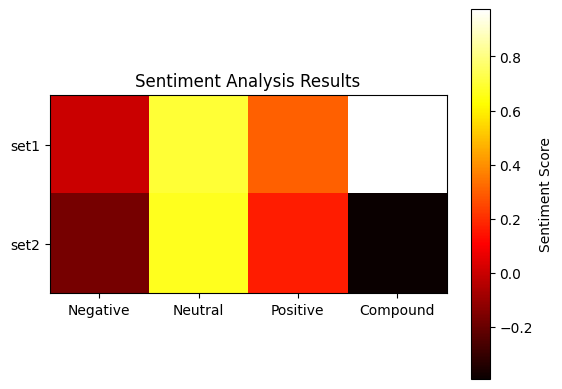

     neg    neu    pos  compound
0  0.048  0.806  0.146    1.0000
1 -0.196  0.608  0.196   -0.0005


In [ ]:
#Create Heatmap for the results
opposite_sentiment_scores = np.array([[0.0 , 0.697 , 0.303 , 0.9738],[-0.167, 0.669, 0.164, -0.3907]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(opposite_sentiment_scores, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()

import pandas as pd
# Sample sentiment scores
sentiment_scores = [
    [0.048 , 0.806 , 0.146 , 1.0],
    [-0.196, 0.608, 0.196, -0.0005]
]

# Create a dataframe to store the sentiment analysis data
sentiment_df = pd.DataFrame(sentiment_scores, columns=['neg', 'neu', 'pos', 'compound'])

# Display the dataframe
print(sentiment_df)

#Sort sentences and Inject more Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "Our day care contract ensures the safety and well-being of your child throughout their time with us",
    "We provide a nurturing and stimulating environment for your child, as outlined in our day care contract",
    "Our day care contract guarantees open and transparent communication between parents and caregivers",
    "We have a comprehensive day care contract that outlines our policies and procedures, ensuring a smooth and organized experience for both parents and children",
    "Our day care contract includes a flexible schedule option, allowing parents to choose the days and hours that best suit their needs",
    "We prioritize the development of social skills and provide opportunities for your child to interact and engage with their peers, as stated in our day care contract"
]

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)

































. 






Free Day Care Contract Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Care provider contracts













MAKE YOUR FREE Day Care Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Day Care Contract
            


Make document                    



 







What is a Day Care Contract?
Day care owners and parents often use Day Care Contracts as a means of documenting the details of child care. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Day Care Contract also made:





Nanny Agreement
Hire a nanny or a babysitter







Pet Sitting Contract
Hire a pet sitter for when you are away







Dog Walking Contract
Put together a contract for dog walking services







Home Health Care Contract
Establish terms for home health care services






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Day Care Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. 



Am I required to do anything else after I have drafted my Day Care Contract?





Upon completing a contract, you will be able to get to it on any device. 



Can I have my Day Care Contracts looked at by a lawyer?





If you attempt it on your own, hiring a lawyer to give feedback on documents may be costly. 



How do I fill out a Day Care Contract for free?





If you need to prepare this document with Rocket Lawyer you can follow the directions provided. 



How should I organize my contract for day care?





While you may have different policies related to the care of infants and preschoolers, here a few high-level details that your Child Care Contract should include:Each parent or legal guardian's full name and addressWhat kind of childcare services will be delivered by the nanny or day care providerInformation about drop-off and pick-up timesMedical treatment and sick child policyWhat fees will be charged and whenAs expected, this contract from Rocket Lawyer also contains the standard legalese about the non-employer relationship between the parties, confidentiality, and dispute resolution.            .           .          The Parent(s) shall provide  with  advance written notice of expected family vacations.                   .                   .                   .                   .                   .                 The Parent(s) shall be responsible to arrange for alternate care if the child(ren) is unable to attend as provided in this Contract.       If a check is returned unpaid, all future payments by the Parent(s) shall be made in cash.       will be reduced proportionately for the days during which the Provider is closed for vacation.                  .                  .                  .                  .                  .                  .                  .                  .                The Parent(s) agrees to provide a medical report describing the child(ren)'s personal medical history to  prior to the child(ren)'s first day of care.        Name:  Name:            .       This contract shall be signed by and by , the Parent(s).              The Parent(s) shall pay child care fees based on the above schedule at the rates specified below.  The child care fees be adjusted for these federal holidays during which 's facility is closed.  shall provide  as well as         The Provider will provide the Parent(s) with a list of substitute child care providers upon request. 's facility                    . **Our day care contract ensures the safety and well-being of your child throughout their time with us**. **Our day care contract guarantees open and transparent communication between parents and caregivers**. **Our day care contract includes a flexible schedule option, allowing parents to choose the days and hours that best suit their needs**. **We have a comprehensive day care contract that outlines our policies and procedures, ensuring a smooth and organized experience for both parents and children**. **We prioritize the development of social skills and provide opportunities for your child to interact and engage with their peers, as stated in our day care contract**. **We provide a nurturing and stimulating environment for your child, as outlined in our day care contract**. AMENDMENT, MODIFICATION, AND WAIVER. ASSIGNMENT. AUTHORITY TO PICK UP CHILD. An easier way to double-check your contract is through the Rocket Lawyer On CallÃÂ® attorney network. As with any legal document that you sign, it is encouraged that you send your document for legal review by a lawyer in our nationwide attorney network. Attached to your Day Care Contract, there's a set of instructions for what comes next after your document is completed. BINDING EFFECT. Breach of this Contract in any way by the Parent(s) may result in immediate termination of child care services. By signing this Contract, the undersigned represents that the undersigned has understood and agreed to the terms and conditions of this Contract. CONSTRUCTION. CONTRACTED HOURS. Child care fees be adjusted for the days a sick child does not attend the child care facility. Child care fees for "Full-Time" prescheduled child care are  per . Child care fees for any unscheduled hours are  per week, or if less than 1 week,  per day, or if less than 1 day,  per hour. Children are expected to treat all property located at the facility with respect, including but not limited to toys and furniture. DAMAGE TO PROPERTY. During the process of making your agreement, you also will have the ability to select which state's jurisdiction it will fall under. EMERGENCY CONTACTS. FEES FOR FULL-TIME CHILD CARE. FEES FOR UNSCHEDULED CHILD CARE. Full-Time child care is defined to be  or more hours per . GOVERNING LAW. HOLIDAYS/VACATIONS. ITEMS SUPPLIED BY . ITEMS SUPPLIED BY PARENT(S). If an attorney does decide to offer assistance, they would still make you pay their standard fees for doing it. If any provision of this Contract is found invalid, the parties agree to sever the invalid portion of the Contract while the remainder of the Contract remains valid and enforceable. If the Parent(s) cannot be reached,  may contact the child(ren)'s physician:        Name of Physician:  Address:  City:  State:  Zip Code:  Telephone Number:              is authorized to provide the physician or a representative of the physician with the following medical information:        Hospital Preference:  Insurance Company:  Policy Number:  Name of Policy Holder:             In case of a medical emergency,  shall obtain the necessary emergency medical care for the child(ren), including but not limited to transportation to an emergency room. If the Parent(s) cannot be reached,  will then contact the following person(s) in the order listed below:       Name:  Relationship:  Address:  City:  State:  Zip Code:  Place of Employment:  Primary Telephone Number:  Other Telephone Number:               . If the child(ren) becomes ill,  will first try to reach the Parent(s). If the child(ren) exhibits any of the symptoms listed below, the child(ren) shall not attend the child care facility until the symptoms are no longer exhibited or unless the Parent(s) has obtained a statement from the child's doctor stating that the child is not contagious. In case of an emergency,  will first try to reach the Parent(s). In consideration of the mutual agreements and covenants contained in this Contract, the parties agree to the following:               . MEDICAL TREATMENT. MERGER. Neither party may assign its interest under this Contract except that the Provider may assign its interest to an entity controlled by . Our step-by-step interview will guide you through several questions to help us produce your Day Care Contract. Payments may be made by . Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Prior agreements made by the parties are deemed to be merged into this Contract. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. SEVERABILITY. SICK CHILD POLICY. Some attorneys will not even agree to review a contract if they weren't the author. State and local laws require certain provisions be included in a Day Care Contract, and they differ from city to city and state to state. TIMING AND METHOD OF PAYMENT. The Parent(s) agrees to pay all costs and expenses incurred in connection with any medical care provided to the child(ren), including the cost of transportation. The Parent(s) agrees to pay for the accidental or willful destruction of any property located at the facility, whether owned by  or any other person, at the replacement cost, if such destruction was, in the sole opinion of , caused by the child. The Parent(s) shall pay child care fees on or before the  day of each . The Parent(s) shall provide the following items to  for the benefit of the child(ren) whenever reasonably requested by :        If the Parent(s) has failed to supply the item within a reasonable period of time, then  may purchase the item and the Parent(s) agrees to reimburse the Provider for the reasonable cost of the item. The Provider shall provide child care services and the Parent(s) shall pay for such services as follows:               Monday:  through       This schedule shall be in effect unless terminated sooner by one of the parties in accordance with this Contract. The child care fees If timely notice is provided, the child care fees will be reduced by  percent for the period of time that the child(ren) is on vacation with his/her family. The child care fees will be reduced proportionately for the days during which 's facility is closed. The final decision as to whether a child will be admitted to the child care facility will be made in the sole discretion of the Provider. The following person(s) has authority to pick up the child(ren):         Name:  Name:  Name:  Name:            The Parent(s) shall inform  in advance if someone other than the Parent(s) or person(s) listed above will pick up the child(ren). The parent should get a copy of your final agreement. The registration fee is nonrefundable and is not applied to any child care fees. This Contract shall be binding on and shall inure to the benefit of the parties and to the executors, personal representatives, heirs, and successors of the parties. This Contract shall be construed and enforced in accordance with the laws of . This document may not cover all laws and regulations governing childcare providers in your area, so it is important to work with a local attorney who can review your document.
When to use a Day Care Contract:
You want to specify important details and policies for a child care facility or nanny.You want to outline your expectations for your child's care.You are a day care provider who wants to get your agreement in writing.





Sample Day Care Contract
The terms in your document will update based on the information you provide





This document has been customized over 88.4K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


    DAY CARE CONTRACT            This Day Care Contract ("Contract") is made effective as of , by and between the following parties:       "Provider":    ,      and      Parents(s) or Legal Guardian(s) ("Parent"):   Name:  Relationship:  Address:  City:  State:  Zip Code:  Place of Employment:  Primary Telephone Number:  Mobile Phone:  Other Telephone Number:      Name:  Relationship:  Address:  City:  State:  Zip Code:  Place of Employment:  Primary Telephone Number:  Mobile Phone:  Other Telephone Number:      To provide child care for:   Child's Name:  Nickname:  Date of Birth:  Sex:      The undersigned Parent(s) hereby gives  permission to care for the above child(ren) in accordance with this Contract. This legal agreement can help to limit conflicts by ensuring that the understanding is mutual between the parties. This list of benefits might help you make the decision to use one:The policies of your child care facility are documentedBoth the caregiver(s) and the parent(s) understand their responsibilitiesBoth parties know when payments are dueNeither party is surprised by how long the contract lasts or what the hours of care areIf you decide against using this document, you may not be able to experience any of the protections associated with having one. This method is often going to be much more affordable and convenient than hiring and working with the average attorney at a cost that can total anywhere from a few hundred dollars to thousands, if your matter is complex.If you've got any particular hesitations or concerns about how to move forward, you can always connect with an attorney . Whether you need to make another Day Care Agreement or other legal documents for day care providers, Rocket Lawyer is here to help. With a Premium membership, you can have your agreements examined by an attorney with business experience. With a Rocket Lawyer membership, you may edit, make copies, print out, sign it electronically using RocketSign®, and download it in PDF format or as a Word document when needed. With the document tool, you are able to add more personalized editing, as necessary. Words and phrases in this Contract shall be construed as in the singular or plural number, and as masculine, feminine or neuter gender, according to the context. You may also wish to explore our entire collection of business documents . You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. amendment, modification, or waiver of any condition, provision, or term in this Contract shall be valid or of any effect unless made in writing, signed by the parties and specifying with particularity the extent and nature of such amendment, modification, or waiver. minute           . reduced by  percent for each full day the child(ren) is absent. will be reduced proportionately for the days during which 's facility is closed.                      By:   Date:                       By:   Date:           




 







Day Care Contract FAQs








Collapse all

|






Expand all







When should a day care operator use a Day Care Contract?





Even if this is your first time caring for children, it's always important to record the details of your work in a contract

Overall Sentiment Score is Positive: {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.9906}
--------------------------------------------------


#Sort sentences and Inject more Negative sentences

In [ ]:
negative_sentences = [
    "The day care contract does not provide any flexibility in terms of pick-up and drop-off times, making it difficult for working parents",
    "The day care contract lacks transparency regarding the fees and charges, leaving parents uncertain about the total cost",
    "The day care contract does not have a clear policy on how they handle medical emergencies, which raises concerns about the safety of the children",
    "The day care contract does not offer any refunds or credits for missed days due to illness or unforeseen circumstances, which can be financially burdensome for parents",
    "The day care contract does not specify the qualifications and training requirements for the staff, making it difficult to trust the quality of care provided",
    "The day care contract does not have a clear procedure for addressing and resolving parent concerns or complaints, leaving parents feeling unheard and frustrated"
]

highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
    if i < len(negative_sentences):
        # Inject negative sentence
        highlighted_sentence_negative = f"**{negative_sentences[i]}**"
        highlighted_text_negative += highlighted_sentence_negative + ". "
    highlighted_text_negative += sentence + ". "

highlighted_text_negative = highlighted_text_negative.split('. ')
highlighted_text_negative.sort()
highlighted_text_negative = '. '.join(highlighted_text_negative)
# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= -1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


. 





























. 






Free Day Care Contract Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Care provider contracts













MAKE YOUR FREE Day Care Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Day Care Contract
            


Make document                    



 







What is a Day Care Contract?
Day care owners and parents often use Day Care Contracts as a means of documenting the details of child care. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Day Care Contract also made:





Nanny Agreement
Hire a nanny or a babysitter







Pet Sitting Contract
Hire a pet sitter for when you are away







Dog Walking Contract
Put together a contract for dog walking services







Home Health Care Contract
Establish terms for home health care services






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Day Care Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. 



Am I required to do anything else after I have drafted my Day Care Contract?





Upon completing a contract, you will be able to get to it on any device. 



Can I have my Day Care Contracts looked at by a lawyer?





If you attempt it on your own, hiring a lawyer to give feedback on documents may be costly. 



How do I fill out a Day Care Contract for free?





If you need to prepare this document with Rocket Lawyer you can follow the directions provided. 



How should I organize my contract for day care?





While you may have different policies related to the care of infants and preschoolers, here a few high-level details that your Child Care Contract should include:Each parent or legal guardian's full name and addressWhat kind of childcare services will be delivered by the nanny or day care providerInformation about drop-off and pick-up timesMedical treatment and sick child policyWhat fees will be charged and whenAs expected, this contract from Rocket Lawyer also contains the standard legalese about the non-employer relationship between the parties, confidentiality, and dispute resolution.            .           .          The Parent(s) shall provide  with  advance written notice of expected family vacations.                   .                   .                   .                   .                   .                 The Parent(s) shall be responsible to arrange for alternate care if the child(ren) is unable to attend as provided in this Contract.       If a check is returned unpaid, all future payments by the Parent(s) shall be made in cash.       will be reduced proportionately for the days during which the Provider is closed for vacation.                  .                  .                  .                  .                  .                  .                  .                  .                The Parent(s) agrees to provide a medical report describing the child(ren)'s personal medical history to  prior to the child(ren)'s first day of care.        Name:  Name:            .       This contract shall be signed by and by , the Parent(s).              The Parent(s) shall pay child care fees based on the above schedule at the rates specified below.  The child care fees be adjusted for these federal holidays during which 's facility is closed.  shall provide  as well as         The Provider will provide the Parent(s) with a list of substitute child care providers upon request. 's facility                    . **The day care contract does not have a clear policy on how they handle medical emergencies, which raises concerns about the safety of the children**. **The day care contract does not have a clear procedure for addressing and resolving parent concerns or complaints, leaving parents feeling unheard and frustrated**. **The day care contract does not offer any refunds or credits for missed days due to illness or unforeseen circumstances, which can be financially burdensome for parents**. **The day care contract does not provide any flexibility in terms of pick-up and drop-off times, making it difficult for working parents**. **The day care contract does not specify the qualifications and training requirements for the staff, making it difficult to trust the quality of care provided**. **The day care contract lacks transparency regarding the fees and charges, leaving parents uncertain about the total cost**. AMENDMENT, MODIFICATION, AND WAIVER. ASSIGNMENT. AUTHORITY TO PICK UP CHILD. An easier way to double-check your contract is through the Rocket Lawyer On CallÃÂ® attorney network. As with any legal document that you sign, it is encouraged that you send your document for legal review by a lawyer in our nationwide attorney network. Attached to your Day Care Contract, there's a set of instructions for what comes next after your document is completed. BINDING EFFECT. Breach of this Contract in any way by the Parent(s) may result in immediate termination of child care services. By signing this Contract, the undersigned represents that the undersigned has understood and agreed to the terms and conditions of this Contract. CONSTRUCTION. CONTRACTED HOURS. Child care fees be adjusted for the days a sick child does not attend the child care facility. Child care fees for "Full-Time" prescheduled child care are  per . Child care fees for any unscheduled hours are  per week, or if less than 1 week,  per day, or if less than 1 day,  per hour. Children are expected to treat all property located at the facility with respect, including but not limited to toys and furniture. DAMAGE TO PROPERTY. During the process of making your agreement, you also will have the ability to select which state's jurisdiction it will fall under. EMERGENCY CONTACTS. FEES FOR FULL-TIME CHILD CARE. FEES FOR UNSCHEDULED CHILD CARE. Full-Time child care is defined to be  or more hours per . GOVERNING LAW. HOLIDAYS/VACATIONS. ITEMS SUPPLIED BY . ITEMS SUPPLIED BY PARENT(S). If an attorney does decide to offer assistance, they would still make you pay their standard fees for doing it. If any provision of this Contract is found invalid, the parties agree to sever the invalid portion of the Contract while the remainder of the Contract remains valid and enforceable. If the Parent(s) cannot be reached,  may contact the child(ren)'s physician:        Name of Physician:  Address:  City:  State:  Zip Code:  Telephone Number:              is authorized to provide the physician or a representative of the physician with the following medical information:        Hospital Preference:  Insurance Company:  Policy Number:  Name of Policy Holder:             In case of a medical emergency,  shall obtain the necessary emergency medical care for the child(ren), including but not limited to transportation to an emergency room. If the Parent(s) cannot be reached,  will then contact the following person(s) in the order listed below:       Name:  Relationship:  Address:  City:  State:  Zip Code:  Place of Employment:  Primary Telephone Number:  Other Telephone Number:               . If the child(ren) becomes ill,  will first try to reach the Parent(s). If the child(ren) exhibits any of the symptoms listed below, the child(ren) shall not attend the child care facility until the symptoms are no longer exhibited or unless the Parent(s) has obtained a statement from the child's doctor stating that the child is not contagious. In case of an emergency,  will first try to reach the Parent(s). In consideration of the mutual agreements and covenants contained in this Contract, the parties agree to the following:               . MEDICAL TREATMENT. MERGER. Neither party may assign its interest under this Contract except that the Provider may assign its interest to an entity controlled by . Our step-by-step interview will guide you through several questions to help us produce your Day Care Contract. Payments may be made by . Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Prior agreements made by the parties are deemed to be merged into this Contract. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. SEVERABILITY. SICK CHILD POLICY. Some attorneys will not even agree to review a contract if they weren't the author. State and local laws require certain provisions be included in a Day Care Contract, and they differ from city to city and state to state. TIMING AND METHOD OF PAYMENT. The Parent(s) agrees to pay all costs and expenses incurred in connection with any medical care provided to the child(ren), including the cost of transportation. The Parent(s) agrees to pay for the accidental or willful destruction of any property located at the facility, whether owned by  or any other person, at the replacement cost, if such destruction was, in the sole opinion of , caused by the child. The Parent(s) shall pay child care fees on or before the  day of each . The Parent(s) shall provide the following items to  for the benefit of the child(ren) whenever reasonably requested by :        If the Parent(s) has failed to supply the item within a reasonable period of time, then  may purchase the item and the Parent(s) agrees to reimburse the Provider for the reasonable cost of the item. The Provider shall provide child care services and the Parent(s) shall pay for such services as follows:               Monday:  through       This schedule shall be in effect unless terminated sooner by one of the parties in accordance with this Contract. The child care fees If timely notice is provided, the child care fees will be reduced by  percent for the period of time that the child(ren) is on vacation with his/her family. The child care fees will be reduced proportionately for the days during which 's facility is closed. The final decision as to whether a child will be admitted to the child care facility will be made in the sole discretion of the Provider. The following person(s) has authority to pick up the child(ren):         Name:  Name:  Name:  Name:            The Parent(s) shall inform  in advance if someone other than the Parent(s) or person(s) listed above will pick up the child(ren). The parent should get a copy of your final agreement. The registration fee is nonrefundable and is not applied to any child care fees. This Contract shall be binding on and shall inure to the benefit of the parties and to the executors, personal representatives, heirs, and successors of the parties. This Contract shall be construed and enforced in accordance with the laws of . This document may not cover all laws and regulations governing childcare providers in your area, so it is important to work with a local attorney who can review your document.
When to use a Day Care Contract:
You want to specify important details and policies for a child care facility or nanny.You want to outline your expectations for your child's care.You are a day care provider who wants to get your agreement in writing.





Sample Day Care Contract
The terms in your document will update based on the information you provide





This document has been customized over 88.4K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


    DAY CARE CONTRACT            This Day Care Contract ("Contract") is made effective as of , by and between the following parties:       "Provider":    ,      and      Parents(s) or Legal Guardian(s) ("Parent"):   Name:  Relationship:  Address:  City:  State:  Zip Code:  Place of Employment:  Primary Telephone Number:  Mobile Phone:  Other Telephone Number:      Name:  Relationship:  Address:  City:  State:  Zip Code:  Place of Employment:  Primary Telephone Number:  Mobile Phone:  Other Telephone Number:      To provide child care for:   Child's Name:  Nickname:  Date of Birth:  Sex:      The undersigned Parent(s) hereby gives  permission to care for the above child(ren) in accordance with this Contract. This legal agreement can help to limit conflicts by ensuring that the understanding is mutual between the parties. This list of benefits might help you make the decision to use one:The policies of your child care facility are documentedBoth the caregiver(s) and the parent(s) understand their responsibilitiesBoth parties know when payments are dueNeither party is surprised by how long the contract lasts or what the hours of care areIf you decide against using this document, you may not be able to experience any of the protections associated with having one. This method is often going to be much more affordable and convenient than hiring and working with the average attorney at a cost that can total anywhere from a few hundred dollars to thousands, if your matter is complex.If you've got any particular hesitations or concerns about how to move forward, you can always connect with an attorney . Whether you need to make another Day Care Agreement or other legal documents for day care providers, Rocket Lawyer is here to help. With a Premium membership, you can have your agreements examined by an attorney with business experience. With a Rocket Lawyer membership, you may edit, make copies, print out, sign it electronically using RocketSign®, and download it in PDF format or as a Word document when needed. With the document tool, you are able to add more personalized editing, as necessary. Words and phrases in this Contract shall be construed as in the singular or plural number, and as masculine, feminine or neuter gender, according to the context. You may also wish to explore our entire collection of business documents . You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. amendment, modification, or waiver of any condition, provision, or term in this Contract shall be valid or of any effect unless made in writing, signed by the parties and specifying with particularity the extent and nature of such amendment, modification, or waiver. minute           . reduced by  percent for each full day the child(ren) is absent. will be reduced proportionately for the days during which 's facility is closed.                      By:   Date:                       By:   Date:           




 







Day Care Contract FAQs








Collapse all

|






Expand all







When should a day care operator use a Day Care Contract?





Even if this is your first time caring for children, it's always important to record the details of your work in a contract

Overall Sentiment Score is Negative: {'neg': -0.167, 'neu': 0.633, 'pos': 0.2, 'compound': -0.8342}
--------------------------------------------------


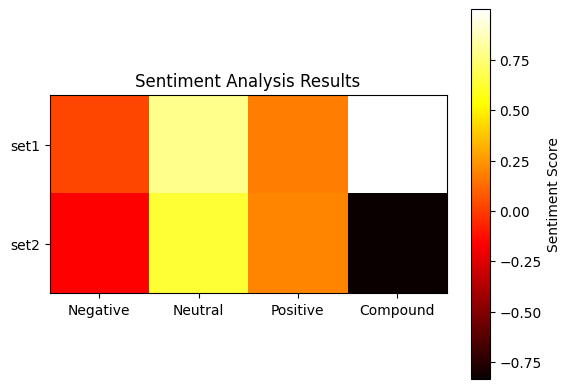

In [ ]:
#Create Heatmap for the results
sentiment_heatmap = np.array([[0.029, 0.792 , 0.179 , 0.9999 ],[-0.167 , 0.633, 0.2 , -0.8342]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(sentiment_heatmap, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()